# HarvardX - Data Science Capstone: Win/Loss Analysis Project

## 1. Introduction

Let's consider a real life scenario where we play the role of a sales executive at an automotive supply wholesaler and investigate a sales execution issue. 

We have not been converting enough opportunities lately. We want to better **understand our sales pipeline and which deals our sales teams can expect to win or lose** based on data that we’ve pulled out of our CRM database.

We want to find the patterns in sales wins and losses and uncover what can lead to successful sales opportunities and better anticipate performance gaps.

## 2. Data

The dataset is a sample provided by IBM in their Watson Analytics community that can be downloaded [here](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/). The "WA_Fn UseC_ Sales Win Loss.csv" file is a dataset that covers sales activities for, amongst others, carrying out a win/loss analysis, to generate the **insights to increase revenues and grow the business**.

#### Dataset Features


| Column name                             | Description                                                                   |
|:----------------------------------------|:------------------------------------------------------------------------------|
| Client Size by Employee Count           | Employee sized by number of clients: <br> • 1: < 1K <br> • 2: [1K, 5K] <br> • 3: [5K, 10K] <br> • 4: [10K, 30K] <br> • 5: ≥ 30K                                                                         |
| Client Size by Revenue                  | Client size based on annual revenue in USD: <br> • 1: < 1M <br> • 2: [1M, 10M] <br> • 3: [10M, 50M] <br> • 4: [50M, 100M] <br> • 5: ≥ 100M                                                               |
| Competitor Type                         | An indicator if a competitor has been identified: <br> Known, Unknown, None   | 
| Deal Size by Category                   | Categorical grouping of the opportunity amount (OpportunityAmountUSD) <br> • 1: < 10K <br> • 2: [10K, 25K] <br> • 3: [25K, 50K] <br> • 4: [50K, 100K] <br> • 5: [100K, 250K] <br> • 6: [250K, 500K] <br> • 7: ≥ 500K                                                                                                                 |
| Opportunity Number                      | A unique generated number assigned to the opportunity                         |
| Opportunity Results                     | A closed opportunity is won or loss. Values could be Win/Loss                 |
| Region                                  | Name of the Region: <br> Mid-Atlantic, Midwest, Northeast, Northwest, Pacific, Southeast, Southwest                                                                                                      |
| Route to Market                         | The opportunities’ route to market: <br> Fields Sales, Other, Reseller, Telecoverage, Telesales                                                                                                   |
| Supplies Group                          | Reporting supplies group: <br> Car Accessories, Car Electronics, Performance & Non-auto, Tires & Wheels                                                                                                  |
| Supplies SubGroup                       | Reporting supplies subgroup: <br> Batteries & Accessories, Car Electronics, Exterior Accessories, Garage & Car Care, Interior Accessories, <br> Motorcycle Parts, Performance Parts, Replacement Parts, Shelters & RV, Tires & Wheels, Towing & Hitches                                                                           |
| Opportunity Amount (USD)                | Sum of line item revenue estimates by sales representative in American currency |
| Sales Stage Change Count                | Actually a count of number of times an opportunity changes sales stages (back and forwards)                                                                                                             |
| Elapsed Days In Sales Stage             | The number of days between the change in sales stages. The counter is reset for each new sales stage                                                                                                      |
| Ratio Days Identified To Total Days     | Ratio of total days the opportunity has spent in sales stage: Identified/Validating over total days in sales process                                                                    |
| Ratio Days Qualified To Total Days      | Ratio of total days the opportunity has been spent in sales stage: <br> Qualified/Gaining Agreement over total days in sales process                                                              |
| Ratio Days Validated To Total Days      | Ratio of total days the Opportunity has presence in sales stage: <br> Validated/Qualifying over total days in sales process                                                                     |
| Revenue From Client Past Two Years      | Revenue identified from this client in past two years <br> • 0: 0 <br> • 1: [1K, 50K] <br> • 2: [50K, 400K] <br> • 3: [400K, 1.5M] <br> • 4: ≥ 1.5M                                                   |
| Total Days Identified Through Closing   | Total days the opportunity has spent in Sales Stages <br> from Identified/Validating to Gained Agreement/closing                                                                         |
| Total Days Identified Through Qualified | Total days the opportunity has spent in CRM Stages <br> from Identified/Validating to Qualified/Gaining Agreement                                                                      |


## 3. Methodology

### 3.1 Exploratory Data Analysis

In this section, we explore the data in two main steps:

* **Initial exploration**

    - Dataset structure, variable formats,
    
    - Missing values,
    
    - Duplicated information,
    
    - Correlation analysis.


* **In-depth exploration for first insights**

### 3.2 Create subsets for the project

We want to create two subsets as follows:

* sales dataset, which contains 90% of our sample dataset, to analyze our sales wins and losses.

* validation dataset, which is the remaining 10%, for the purpose of validation of our predictive model. 

### 3.3 Predictive Model

In this section, we will go through a couple of Machine Learning methods to build a model to support our decisions.

## 4. Results and Discussion 

### 4.1 Exploratory Data Analysis

#### Initial data exploration

In [1]:
# --- LIBRARIES ----------------------------------------------------------------

if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")
if(!require(gridExtra)) install.packages("gridExtra", repos = "http://cran.r-project.org")
if(!require(rpart)) install.packages("rpart", repos = "http://cran.r-project.org")
if(!require(rpart.plot)) install.packages("rpart.plot", repos = "http://cran.r-project.org")
if(!require(randomForest)) install.packages("randomForest", repos = "http://cran.r-project.org")
if(!require(rpart)) install.packages("rpart", repos = "http://cran.r-project.org")
if(!require(rpart.plot)) install.packages("rpart.plot", repos = "http://cran.r-project.org")
if(!require(randomForest)) install.packages("randomForest", repos = "http://cran.r-project.org")

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: rpart
Loading required package: rpart.plot
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

In [2]:
# --- ORIGINAL DATASET ---------------------------------------------------------

# Read csv file from IBM Watson Analytics sample datasets
# https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

crm <- read.csv(url("https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv?cm_mc_uid=32200886596915345345263&cm_mc_sid_50200000=88110211548169944710&cm_mc_sid_52640000=47085071548169944717"), 
              header = TRUE)

In [3]:
# --- INITIAL EXPLORATION OF THE DATASET ---------------------------------------

# Let's have a look at our crm dataset
head(crm)

Opportunity.Number,Supplies.Subgroup,Supplies.Group,Region,Route.To.Market,Elapsed.Days.In.Sales.Stage,Opportunity.Result,Sales.Stage.Change.Count,Total.Days.Identified.Through.Closing,Total.Days.Identified.Through.Qualified,Opportunity.Amount.USD,Client.Size.By.Revenue,Client.Size.By.Employee.Count,Revenue.From.Client.Past.Two.Years,Competitor.Type,Ratio.Days.Identified.To.Total.Days,Ratio.Days.Validated.To.Total.Days,Ratio.Days.Qualified.To.Total.Days,Deal.Size.Category
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4
1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.00000,0.000877,0.000000,5


In [4]:
# Let's see the structure of our dataset and the types of variables that it contains
str(crm)

'data.frame':	78025 obs. of  19 variables:
 $ Opportunity.Number                     : int  1641984 1658010 1674737 1675224 1689785 1692390 1935837 1952571 1999486 2052337 ...
 $ Supplies.Subgroup                      : Factor w/ 11 levels "Batteries & Accessories",..: 3 3 6 9 3 9 4 3 1 3 ...
 $ Supplies.Group                         : Factor w/ 4 levels "Car Accessories",..: 1 1 3 3 1 3 1 1 1 1 ...
 $ Region                                 : Factor w/ 7 levels "Mid-Atlantic",..: 4 5 5 2 5 5 5 5 4 5 ...
 $ Route.To.Market                        : Factor w/ 5 levels "Fields Sales",..: 1 3 3 3 3 3 1 1 1 3 ...
 $ Elapsed.Days.In.Sales.Stage            : int  76 63 24 16 69 89 111 82 68 18 ...
 $ Opportunity.Result                     : Factor w/ 2 levels "Loss","Won": 2 1 2 1 1 1 2 1 1 1 ...
 $ Sales.Stage.Change.Count               : int  13 2 7 5 11 3 12 6 8 7 ...
 $ Total.Days.Identified.Through.Closing  : int  104 163 82 124 91 114 112 70 156 50 ...
 $ Total.Days.Identified.Through.Qu

In [5]:
# We note that some features have the wrong type as integer instead of factor

# Let's convert them to the right type
cols <- c("Client.Size.By.Employee.Count", "Client.Size.By.Revenue", "Deal.Size.Category", "Revenue.From.Client.Past.Two.Years")
crm[, cols] <- data.frame(apply(crm[cols], 2, as.factor))

# Let's check again the types of our variables 
str(crm)

'data.frame':	78025 obs. of  19 variables:
 $ Opportunity.Number                     : int  1641984 1658010 1674737 1675224 1689785 1692390 1935837 1952571 1999486 2052337 ...
 $ Supplies.Subgroup                      : Factor w/ 11 levels "Batteries & Accessories",..: 3 3 6 9 3 9 4 3 1 3 ...
 $ Supplies.Group                         : Factor w/ 4 levels "Car Accessories",..: 1 1 3 3 1 3 1 1 1 1 ...
 $ Region                                 : Factor w/ 7 levels "Mid-Atlantic",..: 4 5 5 2 5 5 5 5 4 5 ...
 $ Route.To.Market                        : Factor w/ 5 levels "Fields Sales",..: 1 3 3 3 3 3 1 1 1 3 ...
 $ Elapsed.Days.In.Sales.Stage            : int  76 63 24 16 69 89 111 82 68 18 ...
 $ Opportunity.Result                     : Factor w/ 2 levels "Loss","Won": 2 1 2 1 1 1 2 1 1 1 ...
 $ Sales.Stage.Change.Count               : int  13 2 7 5 11 3 12 6 8 7 ...
 $ Total.Days.Identified.Through.Closing  : int  104 163 82 124 91 114 112 70 156 50 ...
 $ Total.Days.Identified.Through.Qu

In [6]:
# Let's check if our dataset has missing values
cat("Do we have any missing value?", any(is.na(crm)),"\n")

# Let's check if our dataset has duplicated rows
cat("We have", n_distinct(crm$Opportunity.Number), "unique opportunity numbers out of a total of", nrow(crm), 
    "so the percentage of duplicated rows is:", (1-n_distinct(crm$Opportunity.Number)/nrow(crm))*100)

Do we have any missing value? FALSE 
We have 77829 unique opportunity numbers out of a total of 78025 so the percentage of duplicated rows is: 0.2512015

In [7]:
# So we have 0.25% of our dataset that is duplications. Let's see what rows are duplicated and how they are duplicated.
n_occur <- data.frame(table(crm$Opportunity.Number))
head(crm[crm$Opportunity.Number %in% n_occur$Var1[n_occur$Freq > 1],], 10)

,Opportunity.Number,Supplies.Subgroup,Supplies.Group,Region,Route.To.Market,Elapsed.Days.In.Sales.Stage,Opportunity.Result,Sales.Stage.Change.Count,Total.Days.Identified.Through.Closing,Total.Days.Identified.Through.Qualified,Opportunity.Amount.USD,Client.Size.By.Revenue,Client.Size.By.Employee.Count,Revenue.From.Client.Past.Two.Years,Competitor.Type,Ratio.Days.Identified.To.Total.Days,Ratio.Days.Validated.To.Total.Days,Ratio.Days.Qualified.To.Total.Days,Deal.Size.Category
93,4947042,Exterior Accessories,Car Accessories,Midwest,Fields Sales,88,Loss,4,81,81,600000,3,5,3,Known,0.170972,0.030750,0.798278,7
94,4947042,Towing & Hitches,Car Accessories,Midwest,Fields Sales,88,Loss,4,81,81,200000,3,5,3,Known,0.170972,0.030750,0.798278,5
453,5629727,Shelters & RV,Performance & Non-auto,Northwest,Fields Sales,89,Loss,2,51,51,200000,1,5,0,Unknown,0.000000,1.000000,0.000000,5
454,5629727,Shelters & RV,Performance & Non-auto,Northwest,Fields Sales,89,Loss,2,51,51,0,1,5,0,Unknown,0.000000,1.000000,0.000000,1
725,5799657,Interior Accessories,Car Accessories,Pacific,Fields Sales,83,Loss,3,49,49,250000,4,1,0,Unknown,0.556911,0.443089,0.000000,6
726,5799657,Batteries & Accessories,Car Accessories,Pacific,Fields Sales,83,Loss,3,49,49,350000,4,1,0,Unknown,0.556911,0.443089,0.000000,6
1105,5934206,Garage & Car Care,Car Accessories,Pacific,Fields Sales,89,Loss,4,37,37,25000,1,1,0,Unknown,0.597297,0.402703,0.000000,3
1106,5934206,Batteries & Accessories,Car Accessories,Pacific,Fields Sales,89,Loss,4,37,37,26000,1,1,0,Unknown,0.597297,0.402703,0.000000,3
1153,5943944,Batteries & Accessories,Car Accessories,Midwest,Fields Sales,86,Loss,4,40,40,30000,1,3,0,Known,0.020000,0.235000,0.745000,3
1154,5943944,Batteries & Accessories,Car Accessories,Midwest,Fields Sales,86,Loss,4,40,40,5000,1,3,0,Known,0.020000,0.235000,0.745000,1


In [8]:
# Some duplications are simple row duplication but some others look like an update of the opportunity (mostly the USD amount) in a new row.
# As we don't have any date information to identify the update, we will just delete the duplications. 
crm <- crm[!duplicated(crm["Opportunity.Number"]), ]

# Let's check if our new dataset has missing values
cat("Do we have any missing value?", any(is.na(crm)),"\n")

# Let's check if our new dataset has duplicated rows
cat("We have", n_distinct(crm$Opportunity.Number), "unique opportunity numbers out of a total of", nrow(crm), 
    "so the percentage of duplicated rows is:", (1-n_distinct(crm$Opportunity.Number)/nrow(crm))*100)

Do we have any missing value? FALSE 
We have 77829 unique opportunity numbers out of a total of 77829 so the percentage of duplicated rows is: 0

In [9]:
# Correlation for numeric features
cor(crm[,unlist(lapply(crm,is.numeric))])

,Opportunity.Number,Elapsed.Days.In.Sales.Stage,Sales.Stage.Change.Count,Total.Days.Identified.Through.Closing,Total.Days.Identified.Through.Qualified,Opportunity.Amount.USD,Ratio.Days.Identified.To.Total.Days,Ratio.Days.Validated.To.Total.Days,Ratio.Days.Qualified.To.Total.Days
Opportunity.Number,1.000000000,-0.76497109,-0.25359273,-0.44587215,-0.43543283,-0.01499905,0.002240132,-0.05753584,-0.04840408
Elapsed.Days.In.Sales.Stage,-0.764971087,1.00000000,-0.02533635,-0.02267760,-0.02339319,-0.01392492,-0.018268925,0.01582840,0.02040566
Sales.Stage.Change.Count,-0.253592731,-0.02533635,1.00000000,0.38037554,0.35572017,0.05040764,-0.068135965,-0.01320735,0.28067095
Total.Days.Identified.Through.Closing,-0.445872151,-0.02267760,0.38037554,1.00000000,0.98365127,0.07722813,0.092492819,0.12477671,0.02652307
Total.Days.Identified.Through.Qualified,-0.435432828,-0.02339319,0.35572017,0.98365127,1.00000000,0.07811019,0.104742923,0.14574872,0.02808720
Opportunity.Amount.USD,-0.014999049,-0.01392492,0.05040764,0.07722813,0.07811019,1.00000000,0.067322251,-0.05182146,0.04672572
Ratio.Days.Identified.To.Total.Days,0.002240132,-0.01826893,-0.06813596,0.09249282,0.10474292,0.06732225,1.000000000,-0.47666745,-0.25051351
Ratio.Days.Validated.To.Total.Days,-0.057535839,0.01582840,-0.01320735,0.12477671,0.14574872,-0.05182146,-0.476667451,1.00000000,-0.43473516
Ratio.Days.Qualified.To.Total.Days,-0.048404076,0.02040566,0.28067095,0.02652307,0.02808720,0.04672572,-0.250513511,-0.43473516,1.00000000


Let's have a look at the variables that are significantly correlated (say correlation coefficient either greater than 0.8 or less than -0.8). 

We note that `Total.Days.Identified.Through.Qualified` and `Total.Days.Identified.Through.Closing` are strongly correlated (0.98), which is not surprising as these two variables are related in such that an opportunity stay in the pipeline from identification, through qualification and validation, to closing. 

None of the other numeric features are strongly correlated.

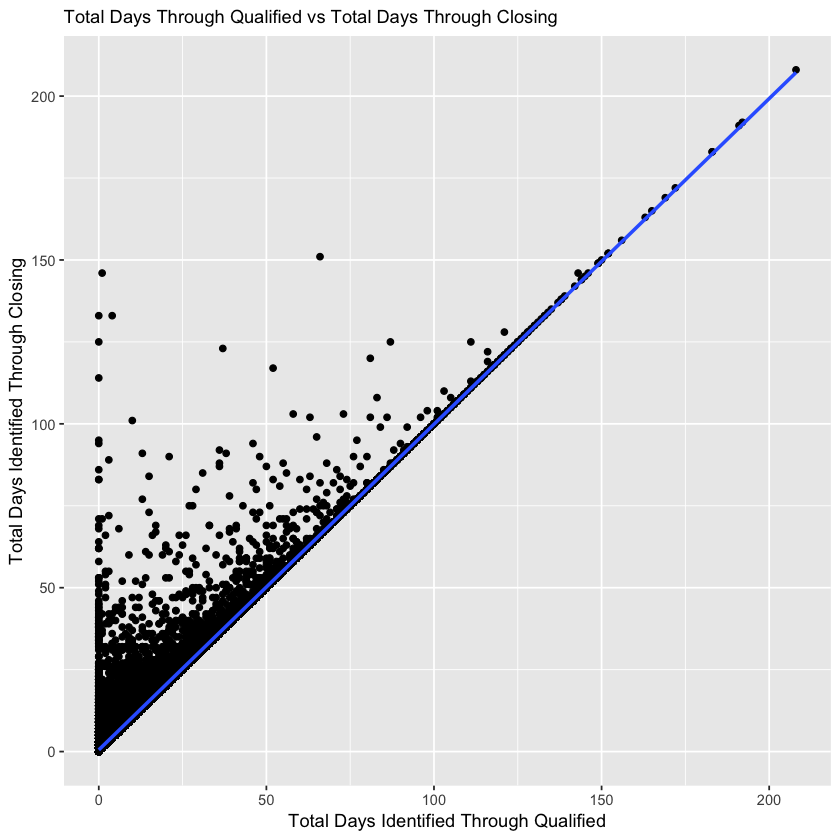

In [10]:
# Correlation between "Total Days Identified Through Qualified" and "Total Days Identified Through Closing"

crm %>%
    select(Total.Days.Identified.Through.Closing, Total.Days.Identified.Through.Qualified) %>%
    
    ggplot(aes(x = Total.Days.Identified.Through.Qualified, y = Total.Days.Identified.Through.Closing)) +
    geom_point() + 
    geom_smooth(method = "lm") +
    labs(subtitle = "Total Days Through Qualified vs Total Days Through Closing", x = "Total Days Identified Through Qualified", y = "Total Days Identified Through Closing")

In [11]:
# Chi-squared test for factor/categorical features

ssg = chisq.test(crm$Supplies.Subgroup, crm$Supplies.Group, simulate.p.value = TRUE)$p.value
sr = chisq.test(crm$Supplies.Subgroup, crm$Region)$p.value
srm = chisq.test(crm$Supplies.Subgroup, crm$Route.To.Market, simulate.p.value = TRUE)$p.value
scsr = chisq.test(crm$Supplies.Subgroup, crm$Client.Size.By.Revenue)$p.value
scse = chisq.test(crm$Supplies.Subgroup, crm$Client.Size.By.Employee.Count)$p.value
sy = chisq.test(crm$Supplies.Subgroup, crm$Revenue.From.Client.Past.Two.Years, simulate.p.value = TRUE)$p.value
sc = chisq.test(crm$Supplies.Subgroup, crm$Competitor.Type)$p.value
sd = chisq.test(crm$Supplies.Subgroup, crm$Deal.Size.Category)$p.value

gr = chisq.test(crm$Supplies.Group, crm$Region)$p.value
grm = chisq.test(crm$Supplies.Group, crm$Route.To.Market, simulate.p.value = TRUE)$p.value
gcsr = chisq.test(crm$Supplies.Group, crm$Client.Size.By.Revenue)$p.value
gcse = chisq.test(crm$Supplies.Group, crm$Client.Size.By.Employee.Count)$p.value
gy = chisq.test(crm$Supplies.Group, crm$Revenue.From.Client.Past.Two.Years, simulate.p.value = TRUE)$p.value
gc = chisq.test(crm$Supplies.Group, crm$Competitor.Type)$p.value
gd = chisq.test(crm$Supplies.Group, crm$Deal.Size.Category)$p.value

rrm = chisq.test(crm$Region, crm$Route.To.Market)$p.value
rcsr = chisq.test(crm$Region, crm$Client.Size.By.Revenue)$p.value
rcse = chisq.test(crm$Region, crm$Client.Size.By.Employee.Count)$p.value
ry = chisq.test(crm$Region, crm$Revenue.From.Client.Past.Two.Years)$p.value
rc = chisq.test(crm$Region, crm$Competitor.Type)$p.value
rd = chisq.test(crm$Region, crm$Deal.Size.Category)$p.value

mcsr = chisq.test(crm$Route.To.Market, crm$Client.Size.By.Revenue)$p.value
mcse = chisq.test(crm$Route.To.Market, crm$Client.Size.By.Employee.Count)$p.value
my = chisq.test(crm$Route.To.Market, crm$Revenue.From.Client.Past.Two.Years)$p.value
mc = chisq.test(crm$Route.To.Market, crm$Competitor.Type)$p.value
md = chisq.test(crm$Route.To.Market, crm$Deal.Size.Category)$p.value

ccse = chisq.test(crm$Client.Size.By.Revenue, crm$Client.Size.By.Employee.Count)$p.value
cy = chisq.test(crm$Client.Size.By.Revenue, crm$Revenue.From.Client.Past.Two.Years)$p.value
cc = chisq.test(crm$Client.Size.By.Revenue, crm$Competitor.Type)$p.value
cd = chisq.test(crm$Client.Size.By.Revenue, crm$Deal.Size.Category)$p.value

ey = chisq.test(crm$Client.Size.By.Employee.Count, crm$Revenue.From.Client.Past.Two.Years)$p.value
ec = chisq.test(crm$Client.Size.By.Employee.Count, crm$Competitor.Type)$p.value
ed = chisq.test(crm$Client.Size.By.Employee.Count, crm$Deal.Size.Category)$p.value

yc = chisq.test(crm$Revenue.From.Client.Past.Two.Years, crm$Competitor.Type)$p.value
yd = chisq.test(crm$Revenue.From.Client.Past.Two.Years, crm$Deal.Size.Category)$p.value

td = chisq.test(crm$Competitor.Type, crm$Deal.Size.Category)$p.value

cormatrix = matrix(c(0, ssg, sr, srm, scsr, scse, sy, sc, sd,
                     ssg, 0, gr, grm, gcsr, gcse, gy, gc, gd,
                     sr, gr, 0, rrm, rcsr, rcse, ry, rc, rd, 
                     srm, grm, rrm, 0, mcsr, mcse, my, mc, md,
                     scsr, gcsr, rcsr, mcsr, 0, ccse, cy, cc, cd,
                     scse, gcse, rcse, mcse, ccse, 0, ey, ec, ed,
                     sy, gy, ry, my, cy, ey, 0, yc, yd,
                     sc, gc, rc, mc, cc, ec, yc, 0, td,
                     sd, gd, rd, md, cd, ed, yd, td, 0), 
                   9, 9, byrow = TRUE)

row.names(cormatrix) = colnames(cormatrix) = c("Supplies.Subgroup", "Supplies.Group", "Region", "Route.To.Market", "Client.Size.By.Revenue",
                                              "Client.Size.By.Employee.Count", "Revenue.From.Client.Past.Two.Years", "Competitor.Type", "Deal.Size.Category")
cormatrix

,Supplies.Subgroup,Supplies.Group,Region,Route.To.Market,Client.Size.By.Revenue,Client.Size.By.Employee.Count,Revenue.From.Client.Past.Two.Years,Competitor.Type,Deal.Size.Category
Supplies.Subgroup,0.000000e+00,4.997501e-04,0.000000e+00,4.997501e-04,2.366019e-119,2.549308e-94,4.997501e-04,4.915601e-283,0.000000e+00
Supplies.Group,4.997501e-04,0.000000e+00,1.838690e-65,4.997501e-04,1.658829e-04,5.520897e-01,4.997501e-04,1.561020e-05,1.329050e-110
Region,0.000000e+00,1.838690e-65,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.677537e-84,0.000000e+00,1.490902e-171
Route.To.Market,4.997501e-04,4.997501e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.490446e-293,6.465001e-262,0.000000e+00,0.000000e+00
Client.Size.By.Revenue,2.366019e-119,1.658829e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.473843e-108,0.000000e+00,1.998643e-287
Client.Size.By.Employee.Count,2.549308e-94,5.520897e-01,0.000000e+00,1.490446e-293,0.000000e+00,0.000000e+00,5.760970e-76,0.000000e+00,3.398658e-271
Revenue.From.Client.Past.Two.Years,4.997501e-04,4.997501e-04,2.677537e-84,6.465001e-262,1.473843e-108,5.760970e-76,0.000000e+00,3.062589e-72,0.000000e+00
Competitor.Type,4.915601e-283,1.561020e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.062589e-72,0.000000e+00,0.000000e+00
Deal.Size.Category,0.000000e+00,1.329050e-110,1.490902e-171,0.000000e+00,1.998643e-287,3.398658e-271,0.000000e+00,0.000000e+00,0.000000e+00


Null hypothesis assumes that there is no association between two variables.

Here, we have all p-values < 0.05, so we reject the null hypothesis and conclude that all the variables are dependent to each other.  

#### In-depth data exploration for first insights 

In [12]:
# Let's see the frequencies for our variable of interest, the win/loss opportunities
table(crm$Opportunity.Result) 


 Loss   Won 
60281 17548 

In [13]:
# Let's see the rates of win/loss opportunities
round(table(crm$Opportunity.Result)/nrow(crm), 2) 


Loss  Won 
0.77 0.23 

The success rate is quite low, **only 23% of our opportunities are converted into revenues**. 

Now, as sales people, we rather focus on revenues and want to first check how we perform:

- across areas, 

- by deal sizes,

- across sales channels.

#### *Deal conversions accross areas*

How do the `Opportunity.Amount` and `Opportunity.Result` compare by `Region`?

In [14]:
cat("The maximum opportunity amount is", max(crm$Opportunity.Amount.USD)/1000, "thousand USD, the average is", 
    round(mean(crm$Opportunity.Amount.USD)), "thousand USD, and the median is",
    median(crm$Opportunity.Amount.USD), "thousand USD.")

The maximum opportunity amount is 1000 thousand USD, the average is 91665 thousand USD, and the median is 49000 thousand USD.

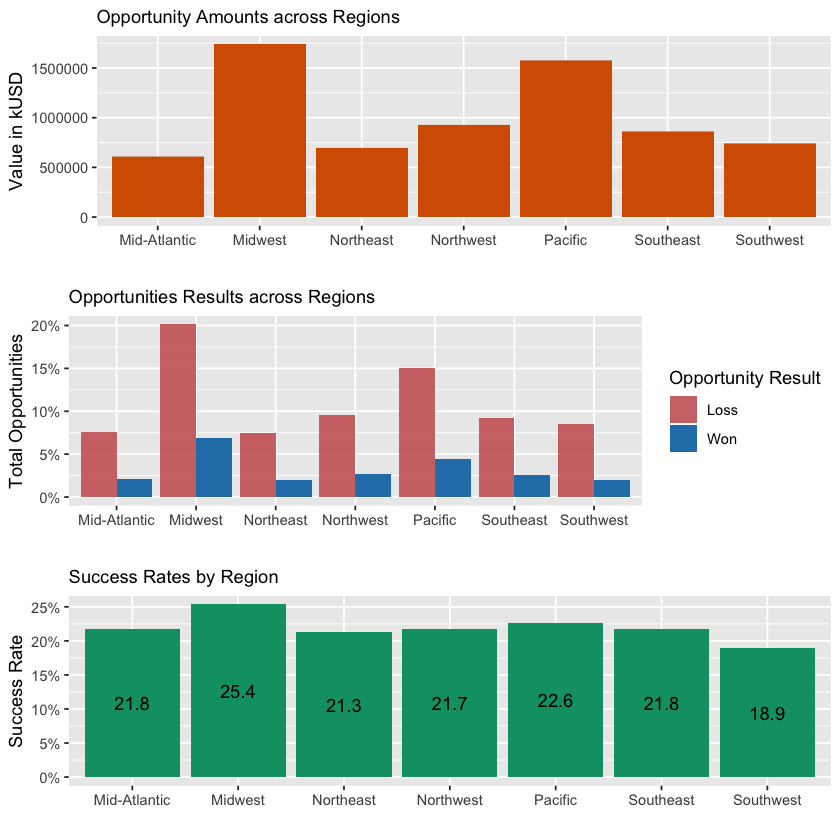

In [15]:
# --- OPPORTUNITY AMOUNTS AND OPPORTUNITY RESULTS BY REGION ---------------------------------------------------------------------

# Opportunity amounts by region
par <- ggplot(data = crm, aes(x = Region, y = Opportunity.Amount.USD/1000)) +
            geom_bar(stat = "identity", fill = "#D55E00") +
            theme(axis.text.x = element_text()) +
            labs(subtitle = "Opportunity Amounts across Regions", x = "", y = "Value in kUSD")


# Opportunity results by region
prr <- ggplot(data = crm, aes(Region, fill = Opportunity.Result)) +
            geom_bar(aes(y = (..count..)/sum(..count..)), alpha = 0.9, position = "dodge") +
            scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
            scale_y_continuous(labels = scales::percent) +
            theme(axis.text.x = element_text()) +
            labs(subtitle = "Opportunities Results across Regions", x = "", y = "Total Opportunities")

# Success rates by region
psr <- crm %>%
        group_by(Region, Opportunity.Result) %>%
        summarise(count = n()) %>%
        spread(key = "Opportunity.Result", value = "count", convert = TRUE) %>%
        mutate(success_rate = Won / (Won + Loss)) %>%

        ggplot(aes(x = Region, y = success_rate)) + 
            geom_bar(stat = "identity", fill = "#009E73") +
            geom_text(aes(label = round(success_rate*100, 1)), position = position_stack(vjust = 0.5)) +
            scale_y_continuous(labels = scales::percent) +
            theme(axis.text.x = element_text()) +
            labs(subtitle = "Success Rates by Region", x = "", y = "Success Rate")

grid.arrange(par, prr, psr, layout_matrix = rbind(c(1, 1, 1), c(2, 2, 2), c(3, 3, 3)))

Midwest and Pacific are our biggest areas in terms of opportunity amounts. 

**Our deal conversion rates across all regions are similarly low, so there is surely room for improving our sales efficiency!** 

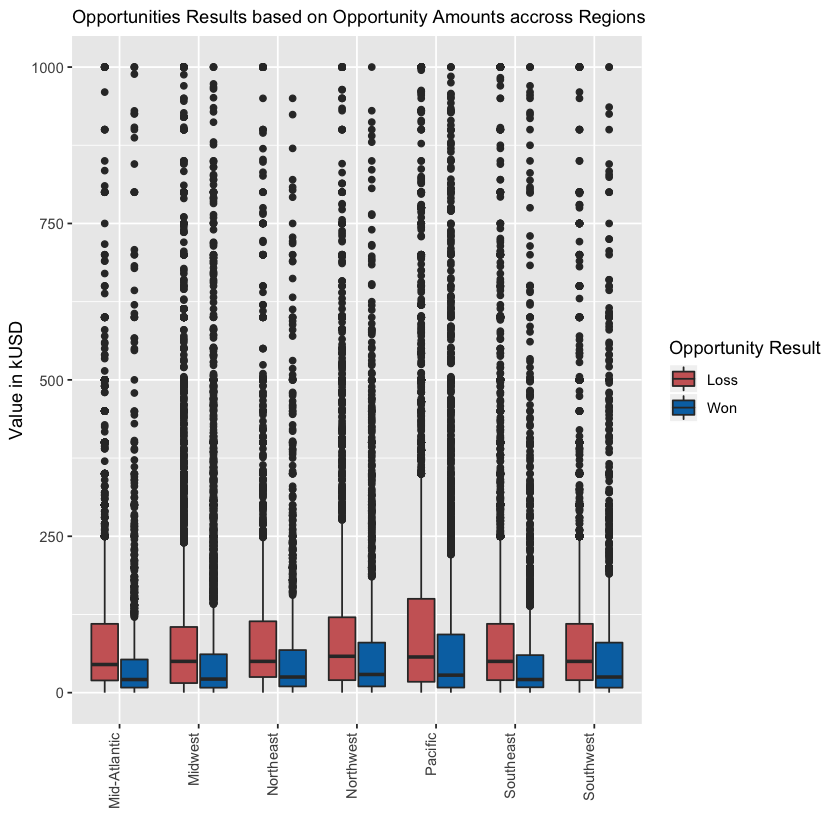

In [16]:
# --- OPPORTUNITY RESULTS BASED ON OPPORTUNITY AMOUNTS BY REGION ----------------------------------------------------------------

# Let's see how the opportunity amount influences our deal outcome
ggplot(data = crm, aes(x = Region, y = Opportunity.Amount.USD/1000, fill = Opportunity.Result)) +
    geom_boxplot() +
    scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
    labs(subtitle = "Opportunities Results based on Opportunity Amounts accross Regions", x = "", y = "Value in kUSD")

The majority of the opportunities are skewed on the low amounts. Interestingly, we note that the medians of won opportunities are with deals lower than 25 kUSD!  

Let's see further how the `Opportunity.Result` compare by `Deal.Size.Category`.

#### *Win / Loss opportunities by deal size categories*

How do the `Opportunity.Result` compare by `Deal.Size.Category`?

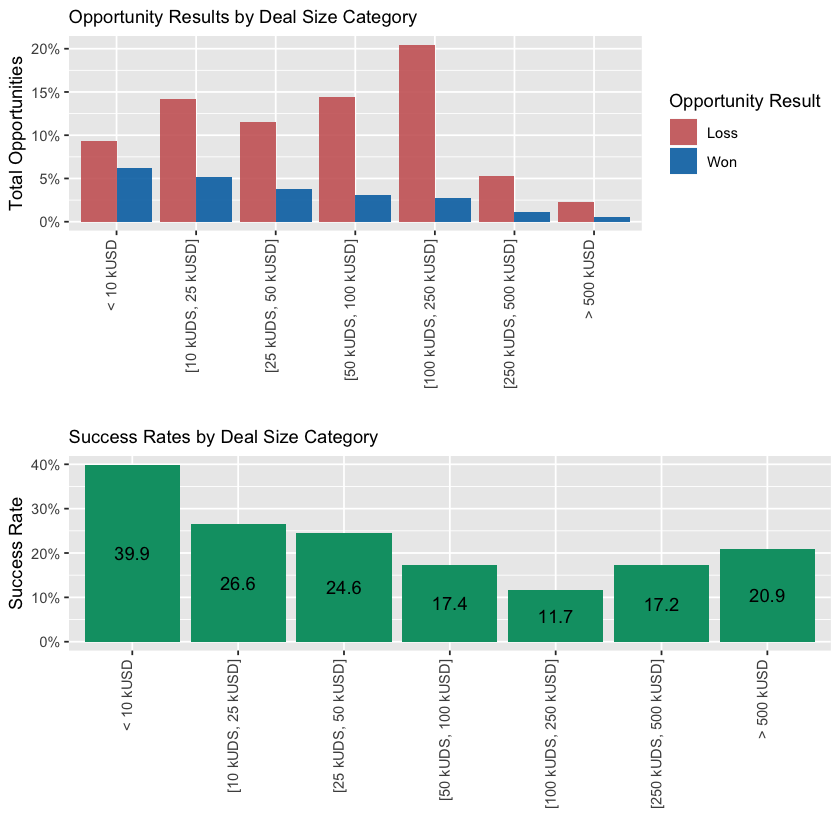

In [17]:
# --- OPPORTUNITY RESULTS BY DEAL SIZE CATEGORY ---------------------------------------------------------------------------------

# Opportunity results by deal size category 
prd <- ggplot(data = crm, aes(Deal.Size.Category, fill = Opportunity.Result)) +
        geom_bar(aes(y = (..count..)/sum(..count..)), alpha = 0.9, position = "dodge") +
        scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
        scale_y_continuous(labels = scales::percent) +
        scale_x_discrete(labels = c("1" = "< 10 kUSD", "2" = "[10 kUDS, 25 kUSD]", "3" = "[25 kUDS, 50 kUSD]",
                                    "4" = "[50 kUDS, 100 kUSD]", "5" = "[100 kUDS, 250 kUSD]", 
                                    "6" = "[250 kUDS, 500 kUSD]", "7" = "> 500 kUSD")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Opportunity Results by Deal Size Category", x = "", y = "Total Opportunities")

# Success rates by deal size category
psd <- crm %>%
        group_by(Deal.Size.Category, Opportunity.Result) %>%
        summarise(count = n()) %>%
        spread(key = "Opportunity.Result", value = "count", convert = TRUE) %>%
        mutate(success_rate = Won / (Won + Loss)) %>%

        ggplot(aes(x = Deal.Size.Category, y = success_rate)) + 
            geom_bar(stat = "identity", fill = "#009E73") +
            geom_text(aes(label = round(success_rate*100, 1)), position = position_stack(vjust = 0.5)) +
            scale_y_continuous(labels = scales::percent) +
            scale_x_discrete(labels = c("1" = "< 10 kUSD", "2" = "[10 kUDS, 25 kUSD]", "3" = "[25 kUDS, 50 kUSD]",
                                        "4" = "[50 kUDS, 100 kUSD]", "5" = "[100 kUDS, 250 kUSD]", 
                                        "6" = "[250 kUDS, 500 kUSD]", "7" = "> 500 kUSD")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
            labs(subtitle = "Success Rates by Deal Size Category", x = "", y = "Success Rate")

grid.arrange(prd, psd, layout_matrix = rbind(c(1, 1), c(2, 2)))

**We won more opportunities for deal size < 10 kUSD** and our success rate decreases as the deal size increases until 
a level of 100 to 250 kUSD. 

#### *Opportunity amount accross regions and sales channels*

How do the `Opportunity.Amount` compare by `Region` and `Route.To.Market`?

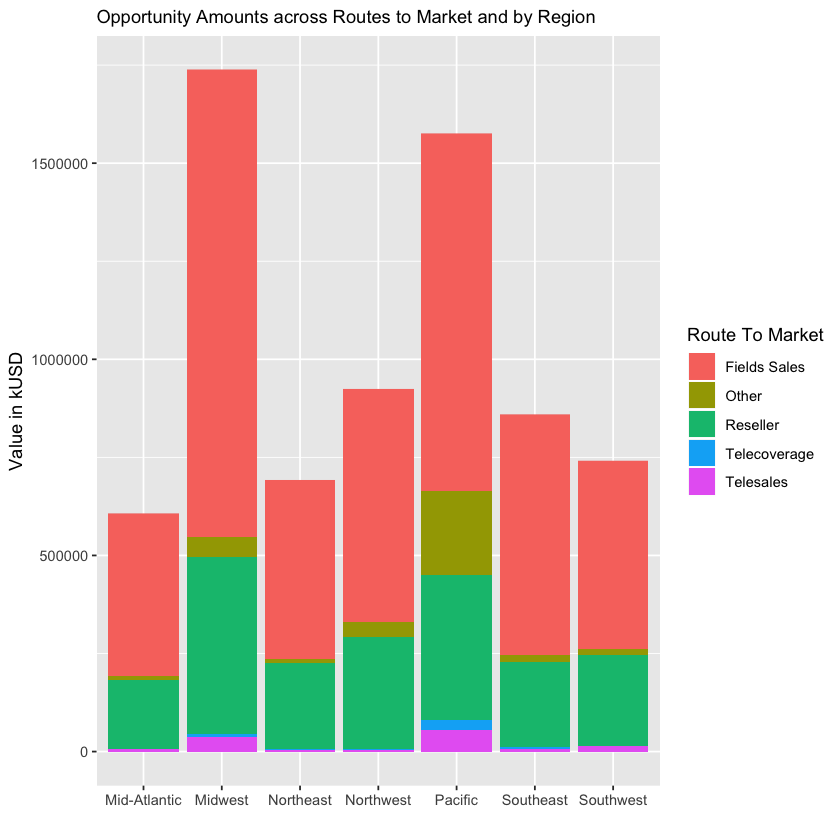

In [18]:
# --- OPPORTUNITY AMOUNTS BY REGION AND ROUTE TO MARKET -------------------------------------------------------------------------

# Routes to Market by Region
ggplot(data = crm, aes(x = Region, y = Opportunity.Amount.USD/1000, fill = Route.To.Market), alpha = 0.9) + 
    geom_bar(stat = "identity", position = "stack") +
    scale_fill_discrete(name = "Route To Market") +
    labs(subtitle = "Opportunity Amounts across Routes to Market and by Region", x = "", y = "Value in kUSD")

Field Sales and Reseller are our two main sales channels accross regions, but how do these sales channels perform?

#### *Win / Loss opportunities accross sales channels and by deal size category*

How do the `Opportunity.Result` compare by `Route.To.Market` and `Deal.Size.Category`?

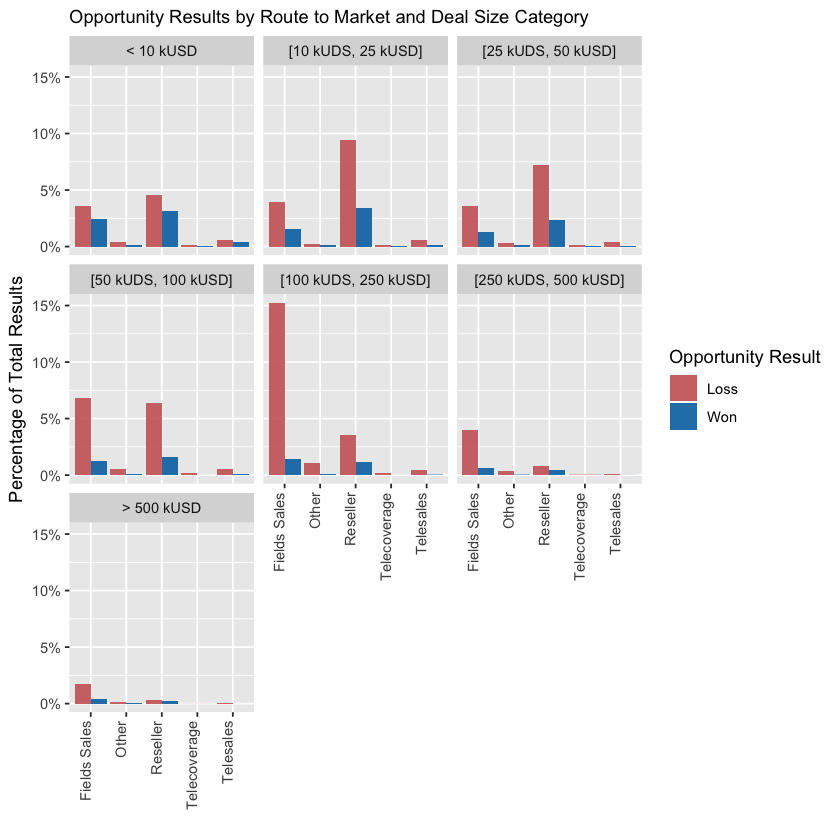

In [19]:
# --- OPPORTUNITY RESULTS BY ROUTE TO MARKET AND DEAL SIZE CATEGORY -------------------------------------------------------------

# Opportunity results by route to market and deal size category 

labels <- c("1" = "< 10 kUSD", "2" = "[10 kUDS, 25 kUSD]", "3" = "[25 kUDS, 50 kUSD]", "4" = "[50 kUDS, 100 kUSD]", 
            "5" = "[100 kUDS, 250 kUSD]", "6" = "[250 kUDS, 500 kUSD]", "7" = "> 500 kUSD")

ggplot(data = crm, aes(Route.To.Market, fill = Opportunity.Result)) +
        geom_bar(aes(y = (..count..)/sum(..count..)), alpha = 0.9, position = "dodge") +
        scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
        scale_y_continuous(labels = scales::percent) +
        facet_wrap(~Deal.Size.Category, labeller = labeller(Deal.Size.Category = labels)) + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Opportunity Results by Route to Market and Deal Size Category", x = "", y = "Percentage of Total Results")

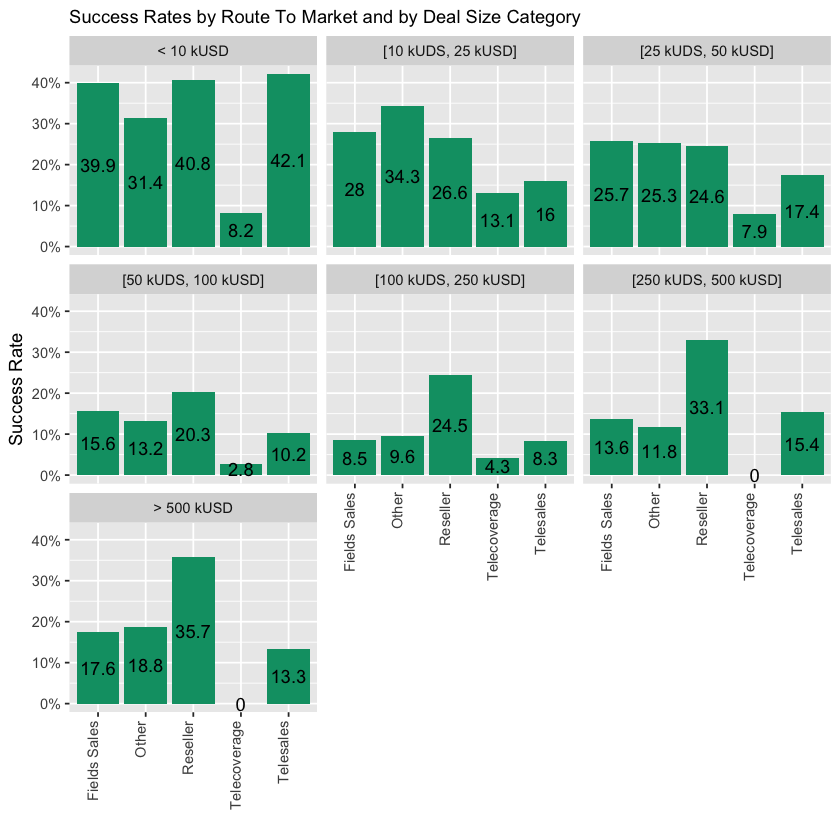

In [20]:
# Success rates by route to market and deal size category

crm %>%
    group_by(Route.To.Market, Deal.Size.Category, Opportunity.Result) %>%
    summarise(count = n()) %>%
    spread(key = "Opportunity.Result", value = "count", fill = 0, convert = TRUE) %>%
    mutate(success_rate = Won / (Won + Loss)) %>%

    ggplot(aes(x = Route.To.Market, y = success_rate)) + 
        geom_bar(stat = "identity",  fill = "#009E73") +
        geom_text(aes(label = round(success_rate*100, 1)), position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        facet_wrap(~Deal.Size.Category, labeller = labeller(Deal.Size.Category = labels)) + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Success Rates by Route To Market and by Deal Size Category", x = "", y = "Success Rate")

There is no clear trend of successful routes to market across deal sizes. 

- Field Sales performance trend follows the general trend accross the deal size categories as seen before. So, we note that slight rebound for opportunities above 250 kUSD. Field Sales could be refocused on bigger deals to increase efficiency.

- Reseller channel performs well and best for all deals > 50 kUSD. We should further develop and support our resellers network.

- Other routes to market efficiency could be somewhat compared to Field Sales.

- Telecoverage performance is poor, it might not be relevant for our business.

- Telesales is the best channel for deals < 10 kUSD.

Based on this finding, we may consider shifting our sales resources as:

- Telesales for opportunities ≤ 10 kUSD,

- Field Sales for opportunities > 250 kUSD,

- Reseller for all opportunities,

- Other for all opportunities,

- Telecoverage should be discontinued.

#### Understanding what drives our sales

With a simple managerial approach, looking at a few variables (`Opportunity.Amount`, `Region`, `Deal.Size.Category` and `Route.To.Market`), we have not been able to uncover the patterns that allow us to determine the successful sales profiles. The best performance we could achieve was a modest 40% of deals conversion with Telesales for opportunities < 10 kUSD.   

**We want to understand what drives our sales, which deals our sales team can expect to win or loose.** In other terms, we want to understand the **why** behind what’s happening. 

With such a large dataset including 19 variables (so as many as 18 possible sales drivers), we can't manually explore each and every variable, not even talking about possible combinations. That is where we bring in **Machine Learning approaches to help us to identify the most significant variables and predict the opportunity results**.

#### Methods to perform a dimension reduction of our dataset so that we can identify the most significant variables

Two very common methods for identifying significant variables are **Decision Tree** and **Random Forests**.

- The **Decision Tree** best feature for analytics is that it is very **easy to interpret** and **results are actionable**! 

- **Random Forests** improve the robustness of our predictions as they aggregate many Decision Trees.

### 4.2 Create subsets for the project

In [21]:
# --- CREATE DATASETS FOR THE PROJECT -------------------------------------------------------------------------------------------

# Sales set is 90% of the crm data and Validation set is the remaining 10%
set.seed(1)
test_index <- createDataPartition(y = crm$Opportunity.Result, times = 1, p = 0.1, list = FALSE)
sales <- crm[-test_index,]
validation <- crm[test_index,]

### 4.3 Predictive Models

In [22]:
# --- SPLIT TRAIN/TEST SETS -----------------------------------------------------------------------------------------------------

set.seed(699)
test_index <- createDataPartition(y = sales$Opportunity.Result, times = 1, p = 0.2, list = FALSE)
train_set <- sales[-test_index,]
test_set <- sales[test_index,]

#### Decision Tree

In [23]:
# --- DECISION TREE WITH RPART PACKAGE ------------------------------------------------------------------------------------------

library(rpart)
library(rpart.plot)

# Fitting decision tree (rpart package) to the train set
# Note that we remove the Opportunity Number as it cannot be an actual cause of our 0pportunity Result
rpa_tree_fit <- rpart(Opportunity.Result ~ . -Opportunity.Number, data = train_set, method = "class") 

# Display the results 
printcp(rpa_tree_fit)


Classification tree:
rpart(formula = Opportunity.Result ~ . - Opportunity.Number, 
    data = train_set, method = "class")

Variables actually used in tree construction:
[1] Opportunity.Amount.USD                 
[2] Ratio.Days.Identified.To.Total.Days    
[3] Ratio.Days.Qualified.To.Total.Days     
[4] Revenue.From.Client.Past.Two.Years     
[5] Sales.Stage.Change.Count               
[6] Total.Days.Identified.Through.Qualified

Root node error: 12634/56035 = 0.22547

n= 56035 

        CP nsplit rel error  xerror      xstd
1 0.140019      0   1.00000 1.00000 0.0078298
2 0.025566      1   0.85998 0.85998 0.0074075
3 0.021002      2   0.83442 0.84439 0.0073560
4 0.019550      6   0.73468 0.74861 0.0070180
5 0.011477      7   0.71513 0.71545 0.0068916
6 0.010000      8   0.70366 0.70659 0.0068569


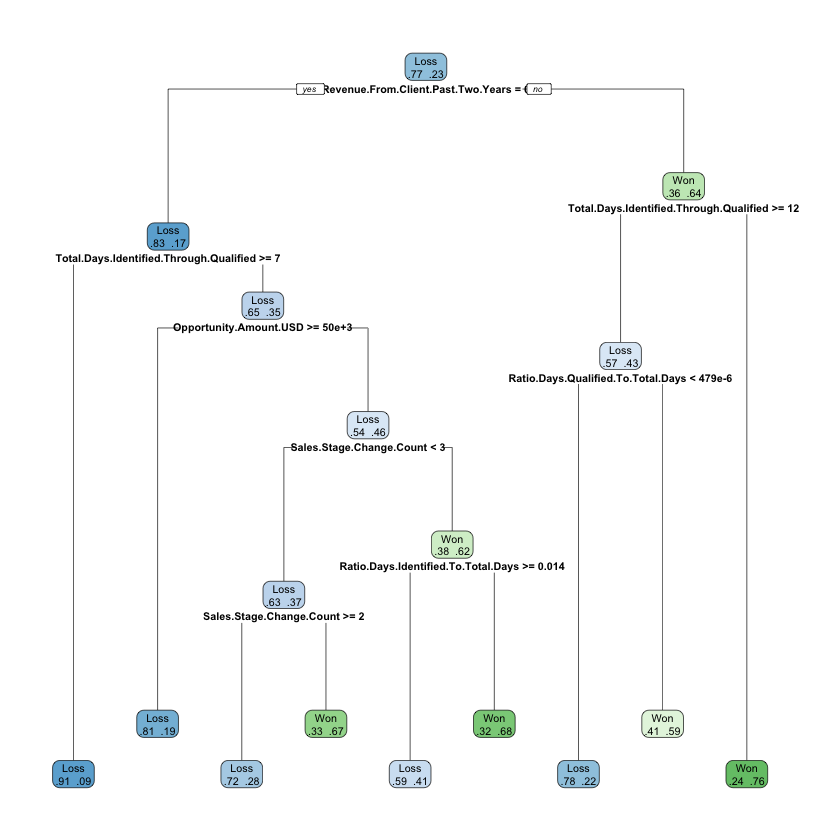

In [24]:
# Tree visualization
rpart.plot(rpa_tree_fit, extra = 4)

In [25]:
 # Detailed summary of splits
summary(rpa_tree_fit)

Call:
rpart(formula = Opportunity.Result ~ . - Opportunity.Number, 
    data = train_set, method = "class")
  n= 56035 

          CP nsplit rel error    xerror        xstd
1 0.14001900      0 1.0000000 1.0000000 0.007829783
2 0.02556593      1 0.8599810 0.8599810 0.007407461
3 0.02100153      2 0.8344151 0.8443882 0.007355987
4 0.01955042      6 0.7346842 0.7486148 0.007018024
5 0.01147697      7 0.7151338 0.7154504 0.006891600
6 0.01000000      8 0.7036568 0.7065854 0.006856927

Variable importance
     Revenue.From.Client.Past.Two.Years Total.Days.Identified.Through.Qualified 
                                     29                                      21 
  Total.Days.Identified.Through.Closing                Sales.Stage.Change.Count 
                                     21                                      10 
                 Opportunity.Amount.USD      Ratio.Days.Qualified.To.Total.Days 
                                      7                                       3 
    Rati

In [26]:
# Predicting the test set results
rpa_tree_pred <- predict(rpa_tree_fit, newdata = test_set[-7], type = "class") # remove "Opportunity Result" for prediction

# Confusion matrix
confusionMatrix(rpa_tree_pred, test_set$Opportunity.Result)

Confusion Matrix and Statistics

          Reference
Prediction  Loss   Won
      Loss 10132  1555
      Won    719  1604
                                          
               Accuracy : 0.8377          
                 95% CI : (0.8315, 0.8438)
    No Information Rate : 0.7745          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4872          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9337          
            Specificity : 0.5078          
         Pos Pred Value : 0.8669          
         Neg Pred Value : 0.6905          
             Prevalence : 0.7745          
         Detection Rate : 0.7232          
   Detection Prevalence : 0.8342          
      Balanced Accuracy : 0.7207          
                                          
       'Positive' Class : Loss            
                                          

We have achieved a decent overall accuracy of 84% with a negative predictive value (the proportion of predicted won opportunities which are real won deals) of 69%.

More importantly, the Decision Tree helped us to understand not only the relationships and associations between features but also the decision rules to generate that tree. 

So the feature of first importance is `Revenue.From.Client.Past.Two.Years`, i.e. the business that we've had with that Customer during the past two years, then the second feature is `Total.Days.Identified.Through.Qualified`, i.e. the number of days to qualify an opportunity from its identification. We may note that `Total.Days.Identified.Through.Closing` can be used as a second feature too. These two variables are strongly correlated as we have seen before and basically bear the same information. The third significant feature is `Sales.Stage.Change.Count`, i.e. the number of times an opportunity changes sales stages (back and forwards) in the sales pipeline. 

**We will focus on two or three features only as we want to keep our insights interpretable and above all actionable**.

#### Random Forest

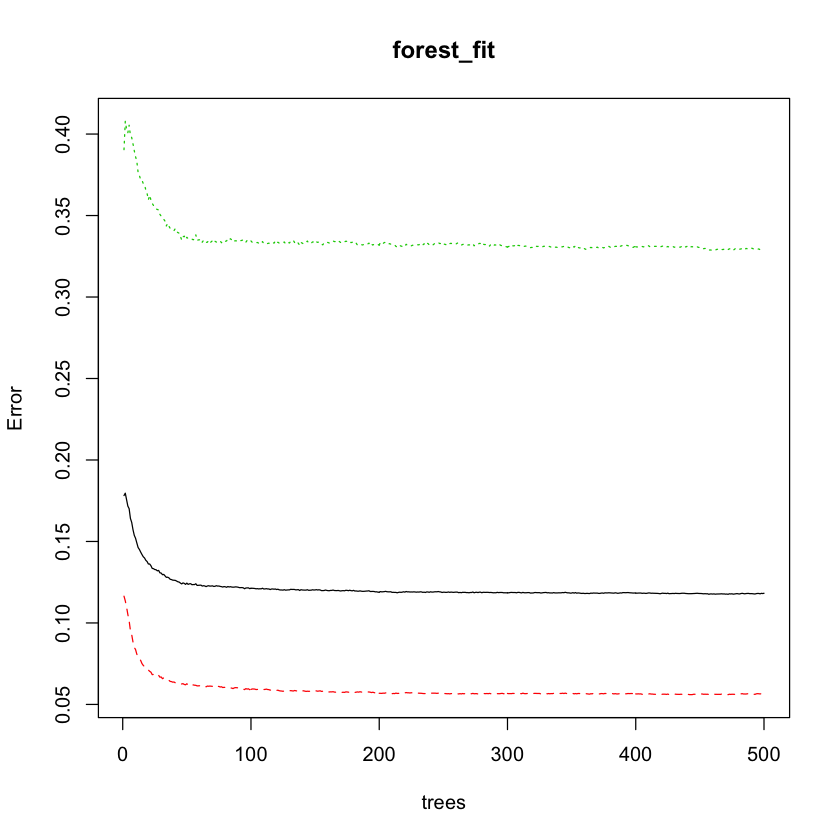

In [27]:
# --- RANDOM FOREST WITH RANDOMFOREST PACKAGE ----------------------------------------------------------------------------------

library(randomForest)

# Fitting random forest to the train set
# Note that we remove the Opportunity Number as it cannot be an actual cause of our 0pportunity Result
forest_fit = randomForest(Opportunity.Result ~ .-Opportunity.Number, data = train_set) 

# Choosing the number of trees
plot(forest_fit)

The green, black and red lines represent error rate for Loss, overall and Won, respectively. 
The overall error rate converges (no further decrease) to around 12%, so the default setting of 500 trees in the randomForest function is fine.

In [28]:
# Variables of importance
apply(importance(forest_fit), 2, sort, decreasing = TRUE)

,MeanDecreaseGini
Revenue.From.Client.Past.Two.Years,2026.8183
Total.Days.Identified.Through.Qualified,2014.5458
Elapsed.Days.In.Sales.Stage,1985.6999
Opportunity.Amount.USD,1917.6508
Total.Days.Identified.Through.Closing,1671.7124
Sales.Stage.Change.Count,1402.7043
Ratio.Days.Qualified.To.Total.Days,1324.6450
Supplies.Subgroup,1123.4961
Region,1070.7206
Ratio.Days.Validated.To.Total.Days,917.7806


In [29]:
# Predicting the test set results
forest_pred = predict(forest_fit, newdata = test_set[-7]) # remove "Opportunity Result" for prediction

# Confusion matrix
confusionMatrix(forest_pred, test_set$Opportunity.Result)

Confusion Matrix and Statistics

          Reference
Prediction  Loss   Won
      Loss 10190  1021
      Won    661  2138
                                          
               Accuracy : 0.8799          
                 95% CI : (0.8744, 0.8853)
    No Information Rate : 0.7745          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6418          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9391          
            Specificity : 0.6768          
         Pos Pred Value : 0.9089          
         Neg Pred Value : 0.7638          
             Prevalence : 0.7745          
         Detection Rate : 0.7273          
   Detection Prevalence : 0.8002          
      Balanced Accuracy : 0.8079          
                                          
       'Positive' Class : Loss            
                                          

With a Random Forest model, we have improved our overall accuracy to 88% with a negative predictive value of 76%. 

Our top 3 predictors are:

- `Revenue.From.Client.Past.Two.Years`, 

- `Total.Days.Identified.Through.Qualified`, 

- `Elapsed.Days.In.Sales.Stage`, i.e. the number of days between the change in sales stages (the counter is reset for each new sales stage).

Note: The two first predictors are the same as given by the Decision Tree.

### Validation

In [30]:
# --- VALIDATION OF RANDOM FOREST MODEL -----------------------------------------------------------------------------------------

# Fitting random forest to the sales set
val_forest_fit = randomForest(Opportunity.Result ~ .-Opportunity.Number, data = sales)

# Variables of importance
apply(importance(val_forest_fit), 2, sort, decreasing = TRUE)

,MeanDecreaseGini
Total.Days.Identified.Through.Qualified,2576.4643
Revenue.From.Client.Past.Two.Years,2544.4756
Elapsed.Days.In.Sales.Stage,2471.0120
Opportunity.Amount.USD,2447.5164
Total.Days.Identified.Through.Closing,2014.2339
Sales.Stage.Change.Count,1702.8337
Ratio.Days.Qualified.To.Total.Days,1645.0344
Supplies.Subgroup,1380.1869
Region,1319.9473
Ratio.Days.Validated.To.Total.Days,1144.1849


In [31]:
# Predicting the validation set results
val_forest_pred = predict(val_forest_fit, newdata = validation[, -7]) # remove "Opportunity Result" for prediction

# Confusion matrix
confusionMatrix(val_forest_pred, validation$Opportunity.Result)

Confusion Matrix and Statistics

          Reference
Prediction Loss  Won
      Loss 5680  547
      Won   349 1208
                                          
               Accuracy : 0.8849          
                 95% CI : (0.8776, 0.8919)
    No Information Rate : 0.7745          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6567          
 Mcnemar's Test P-Value : 4.663e-11       
                                          
            Sensitivity : 0.9421          
            Specificity : 0.6883          
         Pos Pred Value : 0.9122          
         Neg Pred Value : 0.7759          
             Prevalence : 0.7745          
         Detection Rate : 0.7297          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.8152          
                                          
       'Positive' Class : Loss            
                                          

So we valid an **overall accuracy of 88% with a negative predictive value of 77%**.

Note that **we didn't try to optimize accuracy by tuning our models, as our main goal was to reduce the dimension of our dataset and identify the most significant variables with their predictive strengths**. 

Let's see the insights we can gain from our predictive model.

### Insights With One Predictor

We use the most significant predictor identified by our models, i.e. `Revenue.From.Client.Past.Two.Years`.

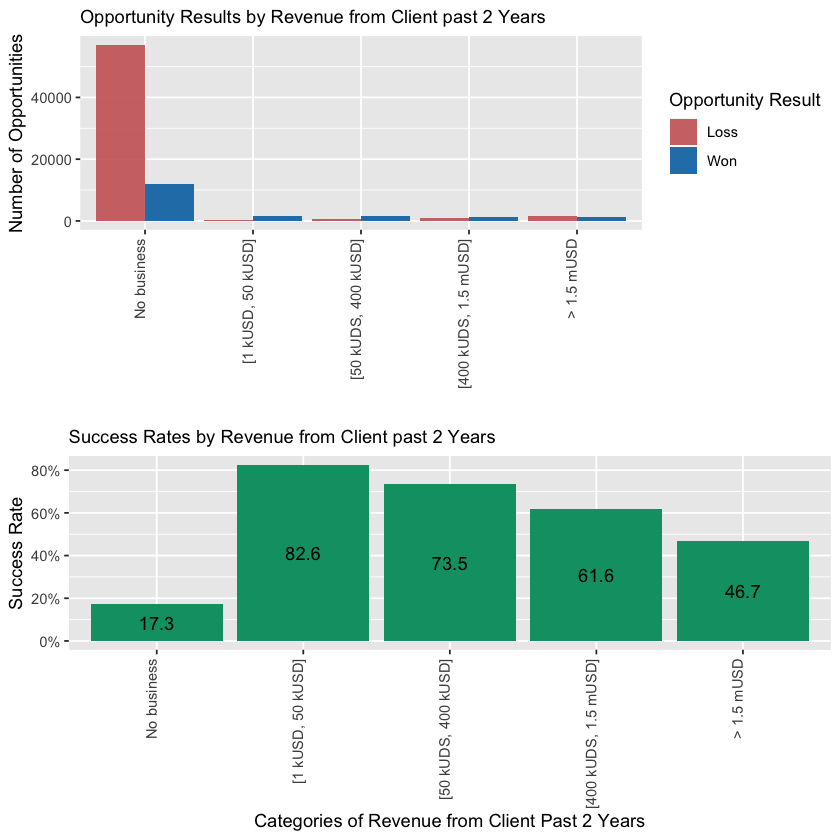

In [32]:
# --- OPPORTUNITY RESULTS BY REVENUE FROM CLIENT PAST 2 YEARS -------------------------------------------------------------------

# Opportunity results by revenue from client past 2 years 
prc <- ggplot(data = crm, aes(Revenue.From.Client.Past.Two.Years, fill = Opportunity.Result)) +
        geom_bar(aes(y = (..count..)), alpha = 0.9, position = "dodge") +
        scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
        scale_x_discrete(labels = c("0" = "No business", "1" = "[1 kUSD, 50 kUSD]", "2" = "[50 kUDS, 400 kUSD]",
                                    "3" = "[400 kUDS, 1.5 mUSD]", "4" = "> 1.5 mUSD")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Opportunity Results by Revenue from Client past 2 Years", x = "", y = "Number of Opportunities")


# Success rates by revenue from client past 2 years 
psc <- crm %>%
        group_by(Revenue.From.Client.Past.Two.Years, Opportunity.Result) %>%
        summarise(count = n()) %>%
        spread(key = "Opportunity.Result", value = "count", convert = TRUE) %>%
        mutate(success_rate = Won / (Won + Loss)) %>%

        ggplot(aes(x = Revenue.From.Client.Past.Two.Years, y = success_rate)) +
            geom_bar(stat = "identity", fill = "#009E73") +
            geom_text(aes(label = round(success_rate*100, 1)), position = position_stack(vjust = 0.5)) +
            scale_y_continuous(labels = scales::percent) +
            scale_x_discrete(labels = c("0" = "No business", "1" = "[1 kUSD, 50 kUSD]", "2" = "[50 kUDS, 400 kUSD]",
                                        "3" = "[400 kUDS, 1.5 mUSD]", "4" = "> 1.5 mUSD")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
            labs(subtitle = "Success Rates by Revenue from Client past 2 Years", x = "Categories of Revenue from Client Past 2 Years", y = "Success Rate")

grid.arrange(prc, psc, layout_matrix = rbind(c(1, 1, 1), c(2, 2, 2)))

Looking at the Client purchase history, if they have bought from us less than 50,000 USD in the past 2 years, we have an **83% chance to successfully close the deal**.

When it comes to very big opportunities (≥ 1.5 mUSD), we close the deal half the time. On the other end, gaining new customers is a real challenge with a success rate of only 17%.   

### Insights With Two Predictors

We use the two most important predictors identified by our models, i.e. `Revenue.From.Client.Past.Two.Years` and `Total.Days.Identified.Through.Qualified`.

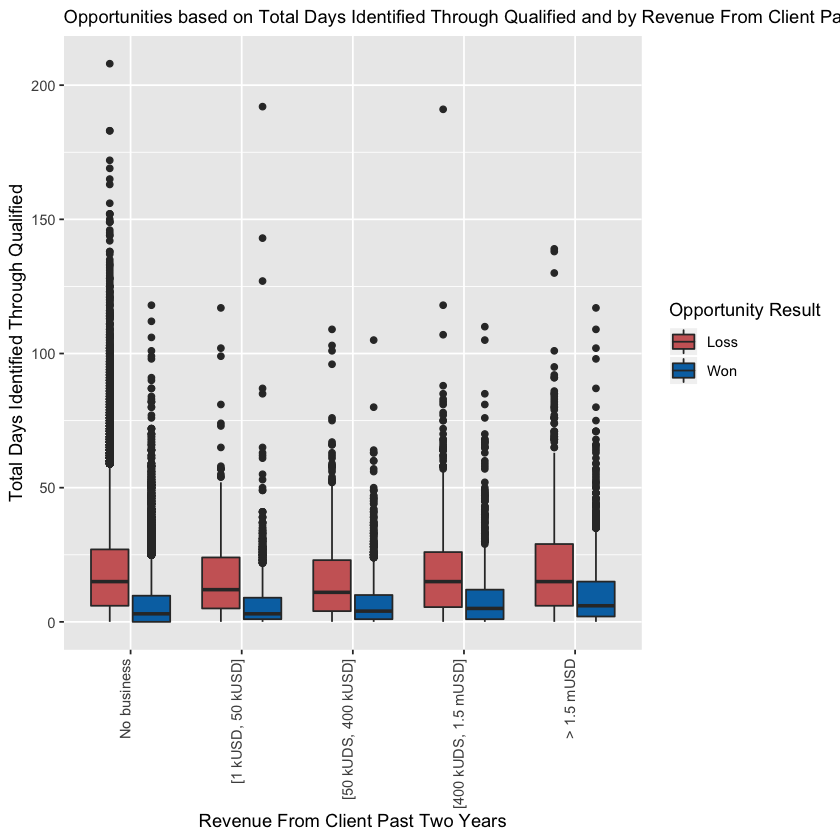

In [34]:
# --- OPPORTUNITY RESULTS BY REVENUE FROM CLIENT PAST 2 YEARS AND TOTAL DAYS IDENTIFIED THROUGH QUALIFIED -----------------------

# Opportunity results by past revenues and total days identified through qualified
ggplot(data = crm, aes(x = Revenue.From.Client.Past.Two.Years, y = Total.Days.Identified.Through.Qualified, fill = Opportunity.Result)) +
    geom_boxplot() +
    scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
    scale_x_discrete(labels = c("0" = "No business", "1" = "[1 kUSD, 50 kUSD]", "2" = "[50 kUDS, 400 kUSD]",
                                "3" = "[400 kUDS, 1.5 mUSD]", "4" = "> 1.5 mUSD")) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
    labs(subtitle = "Opportunities based on Total Days Identified Through Qualified and by Revenue From Client Past Two Years ", 
         x = "Revenue From Client Past Two Years", y = "Total Days Identified Through Qualified")

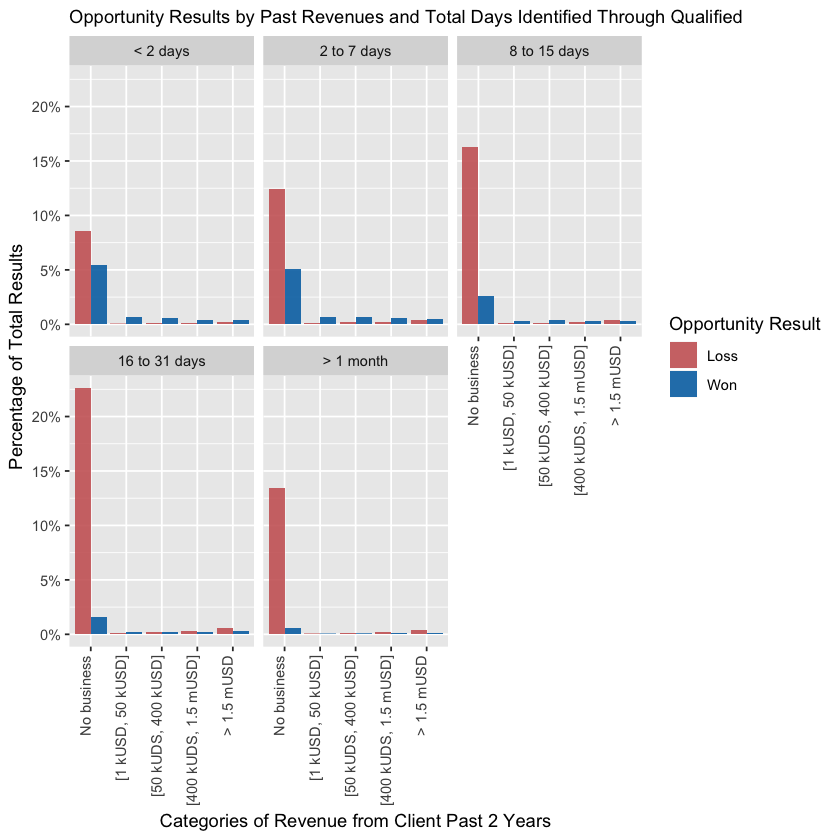

In [35]:
# Opportunity results by past revenues and total days identified through qualified

labels_1 <- c("0" = "No business", "1" = "[1 kUSD, 50 kUSD]", "2" = "[50 kUDS, 400 kUSD]", "3" = "[400 kUDS, 1.5 mUSD]", "4" = "> 1.5 mUSD")
labels_2 <- c("1" = "< 2 days", "2" = "2 to 7 days", "3" = "8 to 15 days", "4" = "16 to 31 days", "5" = "> 1 month")

crm %>% 
    mutate(Total.Days.Identified.Through.Qualified.Category = cut(crm$Total.Days.Identified.Through.Qualified, c(0, 2, 8, 16, 32, 366),
                                                                  right = FALSE, labels = c(1:5))) %>%

    ggplot(aes(Revenue.From.Client.Past.Two.Years, fill = Opportunity.Result)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), alpha = 0.9, position = "dodge") +
        scale_fill_manual(name = "Opportunity Result", values = c("#CC6666", "#0072B2")) +
        scale_y_continuous(labels = scales::percent) +
        scale_x_discrete(labels = labels_1) +
        facet_wrap(~Total.Days.Identified.Through.Qualified.Category, labeller = labeller(Total.Days.Identified.Through.Qualified.Category = labels_2)) + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Opportunity Results by Past Revenues and Total Days Identified Through Qualified", 
         x = "Categories of Revenue from Client Past 2 Years", y = "Percentage of Total Results")

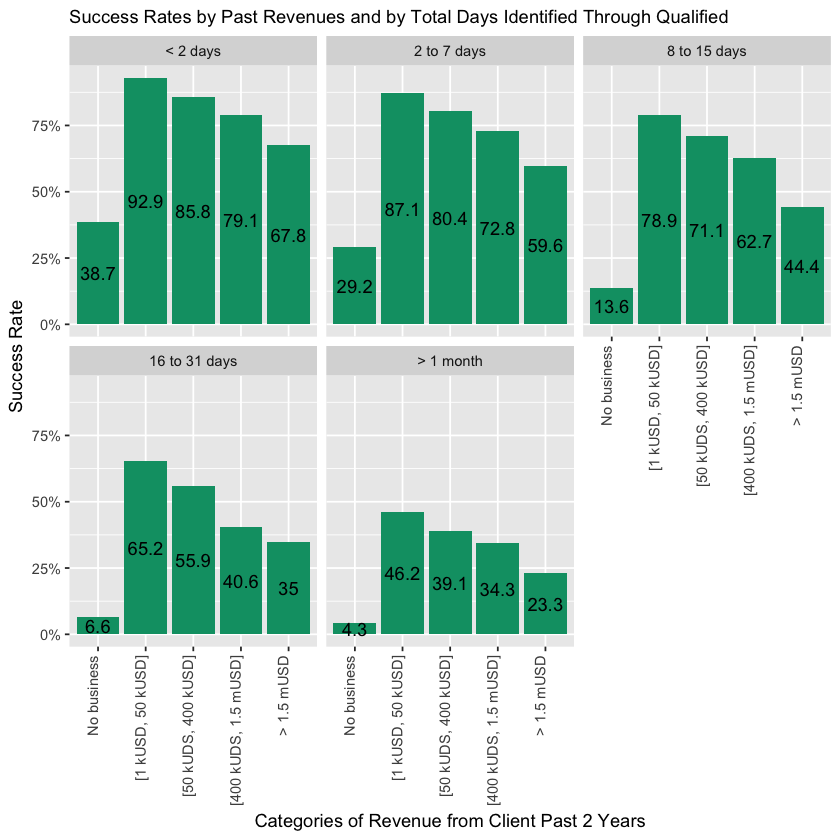

In [36]:
# Success rates by past revenues and total days identified through qualified

crm %>% 
    mutate(Total.Days.Identified.Through.Qualified.Category = cut(crm$Total.Days.Identified.Through.Qualified, c(0, 2, 8, 16, 32, 366), 
                                                                              right = FALSE, labels = c(1:5))) %>%
    group_by(Revenue.From.Client.Past.Two.Years, Total.Days.Identified.Through.Qualified.Category, Opportunity.Result) %>%
    summarise(count = n()) %>%
    spread(key = "Opportunity.Result", value = "count", convert = TRUE) %>%
    mutate(success_rate = Won / (Won + Loss)) %>%

ggplot(aes(x = Revenue.From.Client.Past.Two.Years, y = success_rate)) +
    geom_bar(stat = "identity",  fill = "#009E73") +
    geom_text(aes(label = round(success_rate*100, 1)), position = position_stack(vjust = 0.5)) +
    scale_y_continuous(labels = scales::percent) +
    scale_x_discrete(labels = labels_1) +
    facet_wrap(~Total.Days.Identified.Through.Qualified.Category, labeller = labeller(Total.Days.Identified.Through.Qualified.Category = labels_2)) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
    labs(subtitle = "Success Rates by Past Revenues and by Total Days Identified Through Qualified", x = "Categories of Revenue from Client Past 2 Years", y = "Success Rate")

If we can qualify, within 2 days, an opportunity with customers having purchased for less than 50,000 USD in the last 2 years, we reach **a probability of 93% to successfully close the deal**. 

As a general rule, **the chances of winning a deal decreases as it stays longer in the pipeline**. This could help to formulate thresholds based on how many days a deal is in a pipeline and create alert mechanisms to expedite qualification.  

We also see the **same decrease trend with the increase of purchase history value, for a given qualification time frame**. For example, with an opportunity qualification of 2 to 7 days, we have an 87% chance of successful deal with customers valued at less than 50,000 USD and 60% with those at more than 1.5 mUSD. 

We may also note that **an opportunity is more likely to result in a loss if the client didn’t buy anything from us within the last 2 years** but if we are able to qualify a deal within a week with a new customer, we have more chance of success than our global (over the whole dataset) rate of 23%, as seen in the beginning of our analysis.

### Insights With Three Predictors

We may want to uncover more complex relationships by adding more features, for example with three predictors as `Revenue.From.Client.Past.Two.Years`, `Total.Days.Identified.Through.Qualified` and `Opportunity.Amount.USD`.

Let's say we want to know how we perform with new prospects, with whose we managed to qualify the opportunities, regardless of the USD value, within two weeks.   

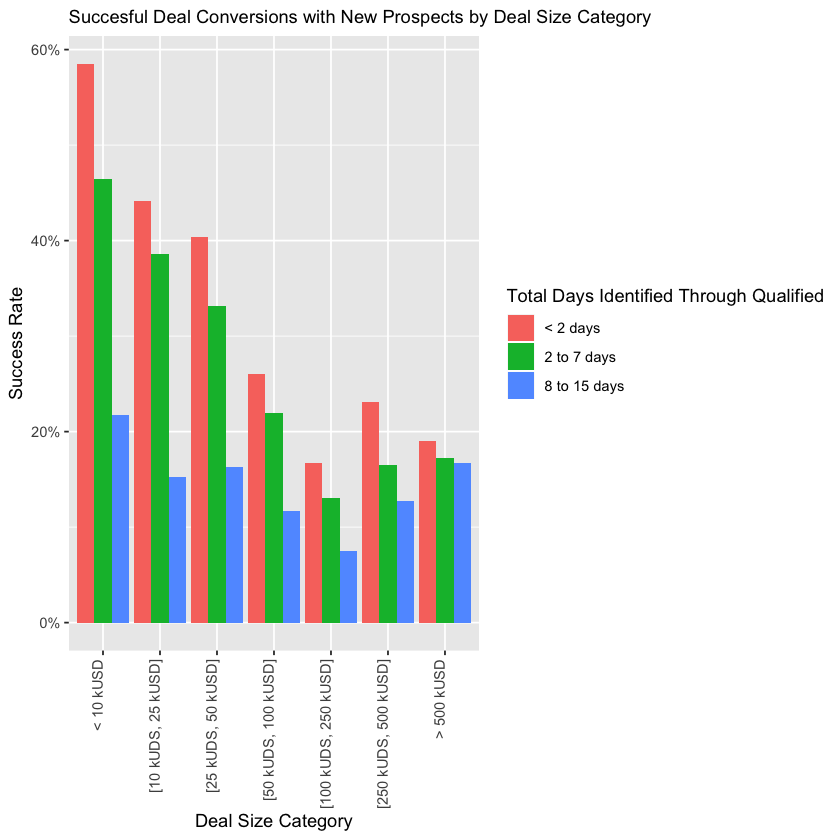

In [37]:
# --- OPPORTUNITY RESULTS BY REVENUE FROM CLIENT PAST 2 YEARS, TOTAL DAYS IDENTIFIED THROUGH QUALIFIED AND DEAL SIZE CATEGORY ---

# Success rates by past revenues, total days identified through qualified and deal size category
crm %>%
    mutate(Total.Days.Identified.Through.Qualified.Category = cut(crm$Total.Days.Identified.Through.Qualified, c(0, 2, 8, 16, 32, 366),
                                                                  right = FALSE, labels = c(1:5))) %>%
    group_by(Revenue.From.Client.Past.Two.Years, Total.Days.Identified.Through.Qualified.Category, Deal.Size.Category, Opportunity.Result) %>%
    summarise(count = n()) %>%
    spread(key = "Opportunity.Result", value = "count", fill = 0, convert = TRUE) %>%
    mutate(success_rate = Won / (Won + Loss)) %>%
    filter(Revenue.From.Client.Past.Two.Years == 0 & Total.Days.Identified.Through.Qualified.Category %in% c(1, 2, 3)) %>%

ggplot(aes(x = Deal.Size.Category, y = success_rate, 
                      group = interaction(Revenue.From.Client.Past.Two.Years, Total.Days.Identified.Through.Qualified.Category, Deal.Size.Category),
                      fill = Total.Days.Identified.Through.Qualified.Category), alpha = 0.9) +
        geom_bar(stat = "identity", position = "dodge") +
        scale_fill_discrete(name = "Total Days Identified Through Qualified", breaks = c(1, 2, 3), labels = c("< 2 days", "2 to 7 days", "8 to 15 days")) +
        scale_y_continuous(labels = scales::percent) +
        scale_x_discrete(labels = c("1" = "< 10 kUSD", "2" = "[10 kUDS, 25 kUSD]", "3" = "[25 kUDS, 50 kUSD]",
                                    "4" = "[50 kUDS, 100 kUSD]", "5" = "[100 kUDS, 250 kUSD]", 
                                    "6" = "[250 kUDS, 500 kUSD]", "7" = "> 500 kUSD")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(subtitle = "Succesful Deal Conversions with New Prospects by Deal Size Category", x = "Deal Size Category", y = "Success Rate")

As we know by now, the chances of successfully closing a deal are higher if we expedite the qualification of the opportunity. Nevertheless, this finding is balanced by the size of the deal. For higher value deals, the impact of qualification speed show a more nuanced picture.     

### More predictors?

At this stage, adding more predictors won't help much but may degrade the interpretability of our findings. Let's keep in mind that we want, above all, **insights that are relevant and actionable!**

## 5. Conclusion 

We started with a set of 78,000 rows and 19 variables of data extracted from our CRM and tried to intuitively interpret it with a managerial approach. We tried to understand what drives our sales and why we have not been converting enough deals.

We looked at some variables that could be strong indicators of our sales performance. We looked at sales results by sales amounts, region, deal size category and route to market. We gained some interesting insights but none of them uncovered success patterns. The best performance we could achieve was a modest 42% deals conversion with Telesales route to market and opportunities of less than 10,000 USD.

With such a large dataset, we couldn't realistically explore each and every variable to gain insights about what opportunities we can expect to win. We had to automatize our exploration process to determine the most significant features, which could strongly predict the opportunities results, specifically the won deals.    

We tried Decision Tree and Random Forests models and achieved very good results. Random Forest yields an overall prediction accuracy of 88% and 77% accuracy on won deals. More importantly, Random Forest could drastically reduce the dimension of our dataset and provide the most significant features for predicting the opportunities results. **Random Forest is a great fit for the job that we had in hands!**

So, we could interpret our large initial dataset in terms that our sales managers can understand. 

We uncovered patterns about our opportunities, sales pipeline and what drives our win and losses. We built easy visualizations to help to **understand the profiles of the most likely successful sales opportunities**. For example, we realized that the chances of winning a deal decreases as it stays longer in the pipeline or that an opportunity is more likely to result in a win if the Client has purchased from us up to 50,000 USD.

**These sales profiles are extremely valuable and more importantly, actionable in the hands of our sales teams**. When reviewing their deal pipeline, our managers can anticipate gaps and correct their sales strategies accordingly. They can focus on the right deals and optimize their progression through the pipeline.

We can uncover more complex relationships by adding predictors according to their significance given by our predictive model, nevertheless we should always keep in mind the need of interpretability and at the end of the day, we want our **insights to be actionable by our sales managers!**

**Note: In this project, we covered typical Data Science aspects with data wrangling (data collection, data tidying, feature engineering), data visualization, and machine learning.**

### Thank you for reading this report!